## Библиотека sckit-learn

- <a href="http://scikit-learn.org/stable/">Scikit-learn</a> - реализация очень многих методов машинного обучения и интеллекуального анализа данных (data mining) с отличной документацией. 

Здесь и далее:

- $ y_i $ - настоящее значение целевой переменной
- $ \hat{y}_i $ - прогноз

# Часть 1. Задачи без компьютера

## Задача 1. Расчет метрик 

Дядя Федор исследует молочность коров в деревне "АБ-тестово" и обучил модель, прогнозирующую, сколько молока в литрах даст корова в зависимости от количества корма. Результаты приведены в таблице.

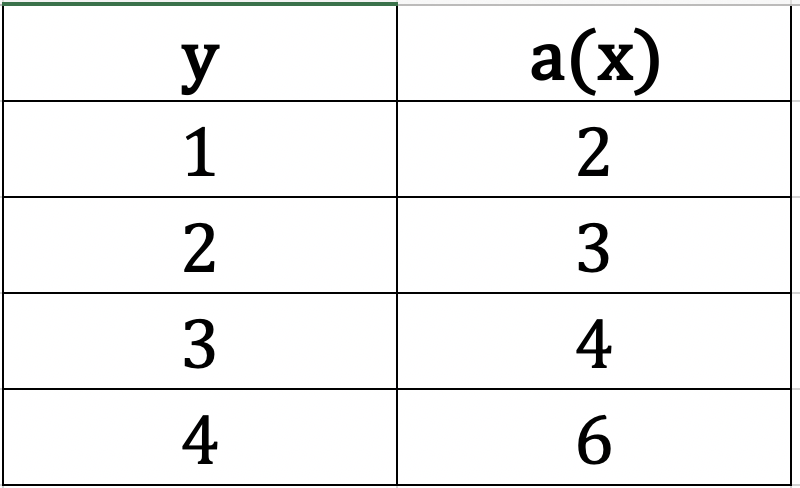

Рассчитайте по показателям метрики MSE, RMSE, MAE, MAPE и $R^2$ 

## Задача 2. Обучение линейной регрессии

Дядя Федор собрал еще данных и решил ореуками рассчитать модель линейной регрессии. 

Пользуясь формулами из лекции, рассчитайте значения коэффициентов и выведите модель линейной регрессии. 
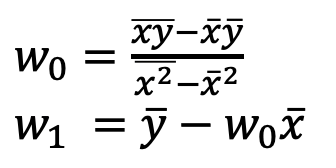

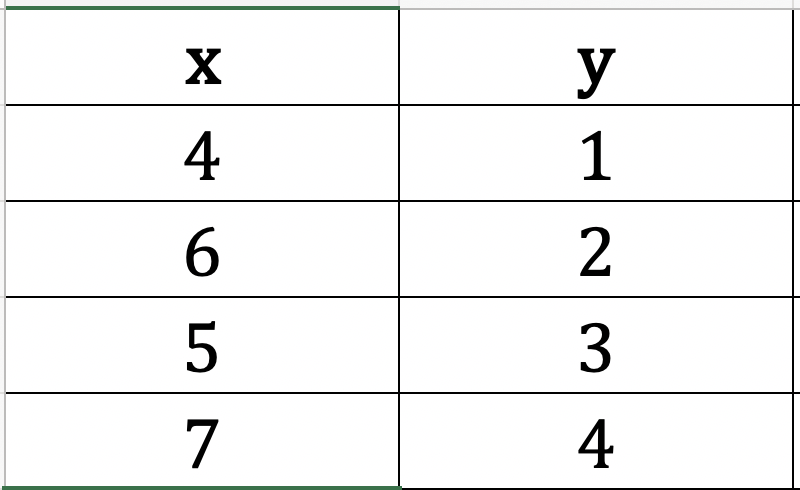

## Задача 3. Градиентный спуск

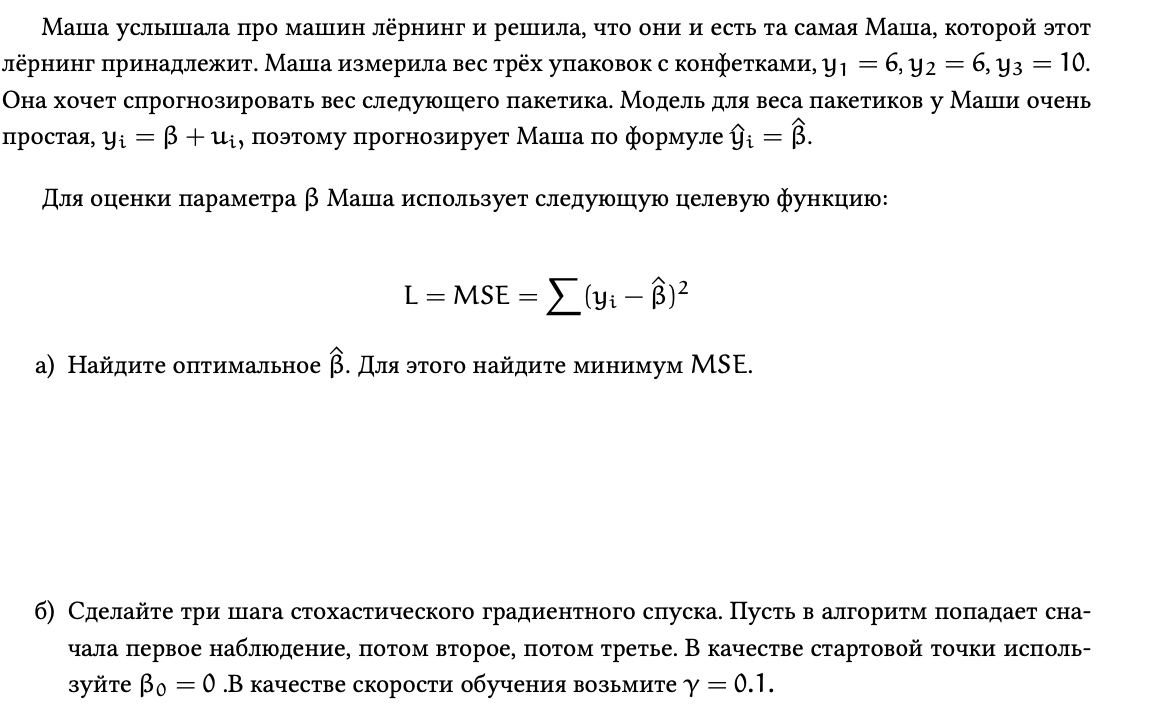

# Часть 2. Оценка качества


Дано: приложение, которое умеет угадывать возраст по картинке.

На семейной вечеринке пятеро братьев и сестер решили повеселиться и посмотреть, сколько лет кому даст приложение.
17-летний Иван, сын одной из сестер, серьезно увлекается машинным обучением, и решил записать, сколько лет его тетушкам, дядям и маме по мнению приложения, и оценить качество модели, которая вшита в это приложение. 

- Y_test - настоящий 

In [ ]:
Y_test = [45, 33, 37, 17, 54, 48]
Y_pred = [38, 34, 33, 19, 40, 53]

In [ ]:
from sklearn import metrics

Первой метрикой, с которой мы познакомимся, будет **MAE (mean absolute error)**, средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$

Если мы спрогнозировали, что квартира стоит 20 рублей, а она стоила 10 рублей, мы ошиблись на |10 - 20| = 10 рублей. Средняя абсолютная ошибка - это средняя сумма рублей, на которую мы ошиблись. 

In [ ]:
metrics.mean_absolute_error(Y_test, Y_pred)

Второй метрикой является **MSE (mean squared error)**, средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

Смысл этой ошибки в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5 долларов, то в ошибку войдёт 25. Если мы ошиблись на 10 долларов, то в ошибку войдёт 100. Чем выше ошибка, тем сильнее штраф. 

In [ ]:
metrics.mean_squared_error(Y_test, Y_pred) ** (1/2)

Часто для нас принципиальным является не то, на сколько денег мы ошиблись, а то на сколько процентов мы ошиблись. Метрика, которая отлавливает процентную ошибку, называется **MAPE (mean absolute percentage error)**, средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$

Она часто применяется в следующих задачах: например, вы прогнозируете спрос, и вам принципиально, на сколько процентов вы ошиблись, а не абсолютное значение. Если вы предсказали  один, а в реальности было  десять - это не то же самое, что вы предсказали  тысяча, а в реальности было  тысяча  девять. С точки зрения МАЕ или MSE, это две совершенно одинаковые ошибки. А если вас интересует, сколько в среднем на сколько процентов вы ошибаетесь, то это отражает МАРЕ.

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print(np.abs((y_true - y_pred) / y_true))
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(Y_test, Y_pred)

Качество построенной регрессии измеряется коэффициентом детерминации
$R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$


In [ ]:
metrics.r2_score(Y_test, Y_pred)

In [ ]:
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

% matplotlib inline

from datetime import datetime # пакет для работы с датами 

# 3. Задача на сегодня: спрогнозировать продажи в Walmart

Этот блок практического материала разработан преподавателями курса "Введение в Data Science" в образовательных целях.

## 3.1 Описание проблемы

В наших руках оказались [исторические данные по продажам $45$ магазинов Walmart](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting), расположенных в разных регионах. Каждый магазан содержит несколько отделов. Наша задача спрогнозировать продажи по каждому отделу для каждого магазина. Зачем нужно уметь прогнозировать подобные вещи? 

* Если мы привезли в магазин слишком мало товара, потребителем его не хватит. Мало того, что они не принесут нам денег, так ещё и станут к нам менее лояльными: "Не поедем в этот магазин. Там вечно ничего нет." 
* Если мы привезли в магазин слишком много товара, то возникают лишние расходы, связанные с хранением товаров, а также лишние расходы, связанные с просрочкой товаров. 

Хотелось бы уметь избегать всех этих лишних расходов и привозить в каждый магазин ровно столько товара, сколько у нас купят. Ясное дело, что для разных типов товаров мы будем нести разные расходы на хранение, более того разные товары портятся с разной скоростью. В идеале было бы круто предсказывать продажи для каждой отдельной группы товаров. 

Например, для овощей у нас одна модель, для телевизоров вторая, а функции потерь зависят от специфика каждого товара. На практике, скорее всего, так и делают. Мы только учимся и такое разнообразие задач нас угробит. Давайте начнём с чего-нибудь попроще.  В нашем датасете нет детализации. Все продажи измеряются в сумме денег, которую магазин смог заработать в течение недели.

In [ ]:
df = pd.read_csv('walmart.csv', sep='\t')  # подгружаем датасет
print('Размерность таблицы:', df.shape)                  # shape показывает его размер
df.head()                    

In [ ]:
df[['Store', 'Dept']].drop_duplicates().groupby('Store').count()

## 3.2. Данные

* `Weekly_Sales` - объём продаж в данную неделю в данном отделе (целевая переменная)
* `Store` - номер магазина;
* `Type` - тип магазина;
* `Size` - размер магазина;
* `Dept` - номер отдела;
* `Date` - дата;
* `IsHoliday` - является ли неделя праздничной;

В Walmart работает несколько акций по уценке товаров. Эти уценки обычно связаны с праздниками: Суперкубок, день Труда, день Благодарения, Рождество. С этими периодами нужно быть аккуратным. Продажи в эти дни аномальны, при этом наблюдений, связанных с этими аномалиями довольно мало.

Для удобства вот информация о всех праздниках, попавших в датасет: 

```
Суперкубок: 12-Фев-10, 11-Фев-11, 10-Фев-12
День Труда: 10-Сен-10, 9-Фев-11, 7-Сен-12
День Благодарения: 26-Ноя-10, 25-Ноя-11, 23-Ноя-12
Рождество: 31-Дек-10, 30-Дек-11, 28-Дек-12
```

* `Temperature` - средняя температура в регионе в градусах по Фаренгейту;
* `Fuel_Price` - стоимость топлива в регионе;
* `MarkDown1-5` - данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в опен сорс.  
* `CPI` - индекс потребительских цен.
* `Unemployment` - уровень безработицы.

In [ ]:
df.info() # посмотрим на то, с какими типами переменных мы имеем дело 

Для удобства, создадим два списка из переменных. В первый войдут все действительные, во второй все категориальные. Переменная `Weekly_Sales` не войдёт ни в один из списов. Мы же её прогнозируем! Переменная `Date` также не войдёт ни в один из списков. Она техническая и нужна для удобства. Мы на её основе сделаем несколько новых переменных немного позже. 

In [ ]:
# Date - техническая переменная, 
# Weekly_Sales - таргет

# категориальные переменные 
var_cat = ['Type', 'Store', 'Dept', 'IsHoliday']

# непрерывные переменные
var_real = ['MarkDown1','MarkDown2', 'MarkDown3',
            'MarkDown4','MarkDown5', 'CPI', 'Unemployment', 
            'Temperature', 'Fuel_Price','Size']

In [ ]:
# мы в России и мы не понимаем что означает температура в Фарингейтах, переведём их в цельсии
df['Temperature'] = (df['Temperature'] - 32) * 5/9

In [ ]:
# посмотрим на основные порядковые статистики, связанные с нашей выборкой
df.describe()

Заметили аномалии? Нет? Присмотритесь к колонке `Weekly_Sales`. Минимальное значение отрицательное. Как думаете, что это значит? Давайте оценим масштаб бедствия. 

In [ ]:
sum(df['Weekly_Sales'] < 0) / df.shape[0]

Таких точек совсем мало. Что же означают отрицательные продажи? Один из способов проинтерпретировать это: нам вернули назад товаров больше, чем мы смогли продать. В маленьких магазинах такое вполне могло произойти. Другая интерпретация: ошибка при создании датасета. Как поступать с такими наблюдениями непонятно. Давайте пока что оставим их. 

Построим несколько картинок, чтобы немного лучше прочувствовать выборку. Посмотрим на то, какое распределение у целевой переменной. 

In [ ]:
df.Dept.unique()

In [ ]:
df.Weekly_Sales.hist(bins=30)

У распределения цен есть проблема - очень длинный хвост. В выборке встречаются магазины (отделы) с большими суммами продаж. Такие наблюдения называются выбросами. С ними нужно бороться, иначе модель подстроится под них. Давайте сгладим распределение цен, прологарифмировав его. Так довольно часто поступают с целевой переменной. Мы ниже попробуем обучить модель на оба таргета.

In [ ]:
df['ln_Weekly_Sales'] = df['Weekly_Sales'].apply(lambda w: np.log(w) if w > 0 else -np.log(-1*w + 1))
df.ln_Weekly_Sales.hist()

Посмотрим на матрицу корреляций. Возможно мы увидем на ней какие-то интересные закономерности. 

In [ ]:
df = df.sort_values(by=['Store', 'Dept', 'Date'])
df['ln_future_sales'] = df['ln_Weekly_Sales'].shift(-1)

In [ ]:
max_date = df['Date'].max()
df = df[df['Date'] != max_date]

In [ ]:
plt.figure(figsize=(10,10))
corr = df.corr()  # посчитали корреляции между регрессорами

# рисуем корреляционную матрицу
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Видим закономерности: 

* Скидки коррелируют между собой
* Более высокий уровень безработицы означает более низкий ИПЦ
* Более высокие номера отделов имеют более высокие продажи. Возможно, это связано с тем, что они новее. 
* Большие магазины генерируют больше продаж.
* Скидки стимулируют продажи.
* Большая безработица приводит в меньшим продажам. 
* Между температурой, праздниками и стоимостью топлива в регионе и продажами почти никакой линейной связи нет. 

Посмотрим на то как распределены наши признаки. Иногда это помогает избежать проблем. 

Последняя картинка перед обработкой данных. Посмотрим на динамику цен в течение приведённых в выборке трёх лет. 

In [ ]:
# картинка с временем года, когда цены самые большие 
dates = list(df['Date'].drop_duplicates())
df.groupby('Date')['Weekly_Sales'].mean().plot(figsize=(15,5))
plt.xticks(np.arange(143), dates, rotation=90)
plt.show()

Наблюдается сезонность в покупках. Есть два пика. Один приходится на день благодарения, второй на рождество. Нужно ввсти какаие-то переменные, которые будут это улавливать.

## 3.3 Предобработка данных

Мы немного посмотрели на картинки, построенные по нашим данным. Этот анализ дал нам несколько идей, связанных с тем какие фичи можно сварить для нашей модели. Пойдём по следущему сценарию: 

* Смотрим на пропуски и боримся с ними
* Делаем крутые переменные
* Смотрим на категориальные переменные и предобрабатываем их
* Разбиваем выборку на тренировочную и тестовую
* Скалируем действительные переменные

Посмотрим на пропуски. На картинке ниже жёлтая клетка - это пропуск. Лиловая - это наблюдение. 

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Видим, что переменные, связанные со скидками довольно пустые. Это может быть связано с двумя причинами: скидок не было либо данные забыли внести. Логично заполнить все пропуски нулями. 

In [ ]:
df.fillna(0, inplace=True)  # опция inplace применяет изменения к df

Приступаем к feauture engineering 

* Чёрная пятница и предрождественские праздники (аномальные покупки)
* Переменная, отвечающая за текущий месяц (сезонность)
* Квадраты некоторых переменных (не будем делать, самостоятельно) 

Что ещё? 


In [ ]:
# Внимание! Сложности! В этой ячейке мы работаем со временем. 
# Работа со временем расписана тут: https://pythonworld.ru/moduli/modul-datetime.html
# делаем у колонки дата временной тип
# df['DateType'] = pd.to_datetime(df['Date'])
from datetime import datetime
df['DateType'] = df['Date'].apply(lambda w: datetime.strptime(w, '%Y-%m-%d')) 

# df['Month'] = df['DateType'].dt.month
# вводим отдельную переменную для месяца, когда происходили продажи 
df['Month'] = df['DateType'].apply(lambda w: 'Month_' + str(w.month))

# Работаем с особыми днями! 
# Чёрная пятница
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | \
                              (df['DateType']==datetime(2011, 11, 25).date()) | \
                              (df['DateType']==datetime(2012, 11, 23).date()), 1, 0)

# Предрождественские деньки: 
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | \
                               (df['DateType']==datetime(2010, 12, 24).date()) | \
                               (df['DateType']==datetime(2011, 12, 23).date()) | \
                               (df['DateType']==datetime(2011, 12, 24).date()) | \
                               (df['DateType']==datetime(2012, 12, 23).date()) | \
                               (df['DateType']==datetime(2012, 12, 24).date()), 1, 0)


Удалим все технические переменные. В нашем случае это дата. 

In [ ]:
df.drop(['DateType', 'Date'], axis=1, inplace=True)

In [ ]:
df.head()

Займёмся предобработкой категориальных переменных. One Hot Encoding в помощь :)

In [ ]:
df['Store'] = df['Store'].astype('str')  # каждое число - категория, сообщим питону об этом
df['Dept'] = df['Dept'].astype('str')    # каждое число - категория, сообщим питону об этом

print('Размерность таблицы до OHE:', df.shape)
df = pd.get_dummies(df, drop_first=True)
print('Размерность таблицы после OHE:', df.shape)
df.head()

Разделим выборку на две части: тренировочную и тестовую.

In [ ]:
y = df['ln_future_sales']
X = df.drop(['ln_future_sales', 'Weekly_Sales'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split  # функция для деления 

# делим в пропорции 70 к 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

Только что мы согрешили. Данные, которые есть у нас в распоряжении имеют структуру временного ряда. То есть то, сколько я купил сегодня, скорее всего зависит от того, сколько я купил вчера. Между соседними наблюдениями есть взаимосвязь. Мы, когда дробим выборку на тренировочную и тестовую, рвём эту взаимосвязь и пренебрегаем ей. 

Часто временная структура данных помогает извлечь дополнительные закономерности. Например, в нашей ситуации мы могли бы для каждого магазина добавить ещё одну объясняющую переменную: вчерашние продажи. Это позволило бы улучшить качество модели. Мы для простоты не будем делать этого.  

Последний предобрабатывательский штрих это шкалирование (стандартизация непрерывных переменных).

In [ ]:
from sklearn.preprocessing import StandardScaler  # класс для скалирования

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train[var_real]) 

In [ ]:
# Применяем скалировщик к трэйну
X_train_scale = scaler.transform(X_train[var_real])

# Применяем скалирвощик к тесту 
X_test_scale = scaler.transform(X_test[var_real])

In [ ]:
# Заменяем значения на проскалированные 
X_train[var_real] = X_train_scale
X_test[var_real] = X_test_scale

## 3.4 Моделирование

### 3.4.1 Наивный прогноз 

Шаг первый. Построим константный прогноз. Будем говорить, что продажи в любом магазине совпадают со средним значением. Это самый глупый прогноз, который мы можем сделать. С ним мы будем сравнивать прогнозы более сложных моделей. 

In [ ]:
from sklearn import metrics  # подгружаем метрики

# функция, которая считает метрики и выводит их на экран
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    pass

In [ ]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им продажи
y_pred_naive[:5]

In [ ]:
# та самая функция, которую мы сделали в самом начале тетрадки
print_metrics(y_test, y_pred_naive)

### 3.4.2  Линейная регрессия

Пришло время построить линейную регрессию! Эта модель говорит, что объём продаж формируется в результате суммирования тех характеристик, которыми обладает магазин с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$

Например, если мы оценили модель и у нас получилось, что 

$$ sales = 10000 + 20 \cdot t,$$

то это означает, что средний объём продаж равен 10 тыс. рублей. При этом каждый дополнительный градус температуры на улице в среднем при прочих равных увеличивает объёмы продаж на 20 рублей. 

Для того, чтобы подобрать коэффициенты обычно минимизируют MSE.

In [ ]:
from sklearn.linear_model import LinearRegression # подгрузили модель

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

Посмотрим на ошибку прогноза на тестовой выборке. По сравнению с наивным прогнозом, она довольно сильно упала. Ура! Наша модель не бесполезна!

In [ ]:
print_metrics(y_test, y_pred_regr)

В следущих двух ячейках код для визуализации результатов. Пока можете проигнорировать его. 

In [ ]:
def visualize_coefficients(model, feature_names, n_top_features=10):
    """
        Рисует картинку с важностью фичей 
            model - модель
            feature_names - названия переменных
            n_top_features - сколько самых важных переменных надо нарисовать
    """

    coef = model.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 1 + 2 * n_top_features), 
                feature_names[interesting_coefficients], rotation=75, ha="right");
    pass


def plot_yreal_ypred(y_test, y_train, X_test, X_train, model, margin=0.3):
    """
        Рисует картинку для прогнозов
            modelt - модель 
            y_train, X_train - обучающая выборка
            y_test, X_test - тестовая выборка
            margin - граница рисунка 
    """
    
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    plt.scatter(y_train, model.predict(X_train), color="red", alpha=0.1)
    plt.xlim(min(y_train) - margin, max(y_train) + margin)
    plt.ylim(min(y_train) - margin, max(y_train) + margin)
    plt.title('Train set', fontsize=20)
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel('Estimated quality', fontsize=14)

    plt.subplot(122)
    plt.scatter(y_test, model.predict(X_test), color="red", alpha=0.1)
    plt.xlim(min(y_test) - margin, max(y_test) + margin)
    plt.ylim(min(y_test) - margin, max(y_test) + margin)
    plt.title('Test set', fontsize=20)
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel('Estimated quality', fontsize=14)
    pass

Давайте посмотрим, какие переменные оказывают самое сильное влияние на продажи. 

In [ ]:
visualize_coefficients(model_regression, X_train.columns, 30)

В результатах нет ничего неожиданного. Продажи сильно зависят от времени года и конкретного магазина. Попробуем добавить в модель немного регуляризации. 

Теперь давайте визуализируем прогнозы. По оси $x$ отложены рельные значения продаж, по оси $y$ отложены прогнозы. Если модель работает хорошо, прогноз должен совпадать с реальным значением и наши точки на обоих картинках должны выстроиться вдоль диагонали. Мы видим, что такого не происходит. Тем не менее можно постараться вытянуть облако ещё сильнее и улучшить прогнозы. 

In [ ]:
plot_yreal_ypred(y_test, y_train, X_test, X_train, model_regression)

### 3.4.3 Lasso-регрессия 

Оценим Lasso-регрессию. Напомню, что её основная фишка в том, что она зануляет коэффициенты перед несущественными переменными. Вместо MSE минимизируется функционал 

$$MSE + \alpha \cdot \sum |\beta|.$$ 

Это позволяет дать бой переобучению отобрать самые важные фичи. Гиперпараметр $\alpha$ приходится подбирать отдельно. Попробуем сначала обучить дефолтную модель. В ней $\alpha = 1$. 

In [ ]:
from sklearn.linear_model import Lasso  # подгрузили модель




In [ ]:
# Объявите модель
model_simplelasso =

In [ ]:
# Обучите модель на тренировочной выборке 


In [ ]:
# Сделайте прогнозы
y_pred_lasso = 

In [ ]:
print_metrics(y_test, y_pred_lasso)

Попробуем подобрать оптимальное значение для  параметра. 

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

In [ ]:
print_metrics(y_test,y_pred_lasso)

Видим, что в данном случае гиперпараметр хочет обратиться в ноль. На этом остановимся в модернизации регрессии. Давайте посмотрим напоследок ещё одну модель. 

### 3.4.5. Самостоятельно подберите гиперпараметр и обучите Ридж-регрессию

In [ ]:
from sklearn.linear_model import Ridge

## 4. Сравниваем модели между собой 

In [ ]:
print_metrics(y_test,y_pred_naive)

In [ ]:
print_metrics(y_test,y_pred_regr)

In [ ]:
print_metrics(y_test,y_pred_lasso)